# PyLondinium 2019

Mal Minhas, 16.06.19

This is a write up of a few cool things I learned while attending the Saturday session of [PyLondinium 2019](https://pylondinium.org) at Bloomberg HQ.  I was only able to make one day of the three day conference as was the case last year.  All the talks I were in were interesting and offered helpful insights into different aspects of Python development.  The location and conference setup were also very impressive.  Kudos to all the volunteers and Bloomberg staff who made it happen!  Next year I will try and make all three days

<a id='contents'></a>
### Contents

1. [Voilà, Jupyter Lab<a href="#section1"></a>](#section1)
2. [Bloomberg and Mithraeum<a href="#section2"></a>](#section2)
3. [Rolling dice<a href="#section3"></a>](#section3)
4. [Cold starts<a href="#section4"></a>](#section4)
4. [Asyncing feeling<a href="#section5"></a>](#section5)
5. [Micropython<a href="#section6"></a>](#section6)

<a id='section1'></a>
## 1. Voilà, Jupyter Lab

[<a href="#contents">back to contents</a>](#contents)

[Sylvain Corlay](https://twitter.com/SylvainCorlay?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor)'s assured morning keynote made clear that Jupyter Lab is on track to become the de facto standard desktop for scientists.  In his view the Jupyter ecosystem has grown from strength to strength because of an explicit focus on specificiation over any specific implementation.  A clear focus on comms protocols, formats and serialization schemas has allowed Jupyter to turn into the _"HTTP of scientific computing"_.  The provision of an interactive C++ kernel support in the form of [xeus-cling](https://github.com/QuantStack/xeus-cling) is an example of the fruits of a well thought-through system architecture though it only appears to work in a conda setup today.  Jupyter Notebooks have arguably changed development workflow and elevated the importance of the REPL.  Juptyer Lab takes things further than the old IPython setup by offering a single integrated environment for full data science workflow support encompassing Notebooks, the terminal and other integrations.  Issues remain, most notably in exporting a Notebook into a form that non-technical readers can interact with.  The [Binder](https://mybinder.readthedocs.io/en/latest/) project was an important attempt to create shareable and reproducible environments and has helped make Jupyter Notebooks more accessible in GitHub repositories for instance.  The [voila](https://blog.jupyter.org/and-voilà-f6a2c08a4a93) initiative takes things even further by converting your Notebook into a standalone interactive single page application (SPA).  This has the potential to revolutionise the impact of Jupyter beyond Engineering and Data teams:

> This is huge - This basically allows your analysts and data scientists to have a company wide impact by productionizing your code.

I ran voila on this notebook and found the results to be impressive but not complete.  The altair visualisation in section 3 didn't work:

![Voila.png](Voila.png)

Docker was mentioned in several of the talks as the emerging standard approach for packaging data pipelines built around modules created from code developed inside of Jupyter Notebooks.  Once inside of Docker containers, Kubernetes cloud orchestration can be used to scale the pipeline as needed.

<a id='section2'></a>
## 2. Bloomberg and Mithraeum

[<a href="#contents">back to contents</a>](#contents)

The Bloomberg staff organised a tour of the office during the lunch break.  The central section of the Bloomberg building is comprised of a vortex structure with a walkway all the way through it.  Towards the top there is a very detailed scale model of the building.  Inevitably the question was asked as to why there wasn't a scale model of the scale model inside the scale model accompanied by a small group standing around that model...

<img style="float:center; width:600px" src="Bloomberg.jpg" />

At the end of the tour we got to visit the [Mithraeum](https://en.wikipedia.org/wiki/London_Mithraeum), a Roman temple built around 2000 years ago and dedicated to the god Mithras which was uncovered in building work in 1954.  It is now preserved underneath the Bloomberg office in a spectacular atmospheric setting.  As you walk in you hear spoken commentary and Latin voices and can glimpse the outline of the temple pillars projected onto a thin smoky mist in ethereal gloom:

<img style="float:center; width:600px" src="Mithraeum.jpg" />

We ended up in an accompanying museum which had a couple of rare treasures from the Roman period of major significance to the history of London:

> Among the messages is the oldest financial document from London, dated AD 57,[9] and two addresses from AD 62 and AD 70 containing the earliest mention of London

The wooden tablet from 62AD inscribed with _Londonio_ is shown below:

<img style="float:center; width:600px" src="Londinio.jpg" />

<a id='section3'></a>
## 3. Rolling dice
[<a href="#contents">back to contents</a>](#contents)

An entertaining lightning talk introduced [a Python module called `dragn`](https://pypi.org/project/dragn/) which encapsulates different types of dice the singular of which is die of course as the presenter went to pains to make clear :-).  The module is on PyPI so after pip installing into your virtual env, here is a simple example of how to use it to simulate ten throws of a 6-sided die:

In [1]:
from dragn.dice import D6,D12
[D6() for _ in range(10)]

[5, 6, 6, 1, 5, 2, 2, 5, 3, 2]

Now we can create a tumbler comprised of 3 12-sided dice and roll that tumbler a million times.  We're interested in the sum of the three random faces generated per throw of the tumbler.  Say we throw 8, 3 and 11 that sum will be 22.  For a 12-sided die, the minimum possible value that can be thrown is 3 (1,1 and 1) and the maximum is 36 (12,12 and 12). We can use a `Counter` to record all these sums into a list of one million totals thus:

In [2]:
%%time

from collections import Counter
total = []
c = Counter()
nthrows = 1000000
for i in range(nthrows):
    tumbler =[D12() for _ in range(3)]
    total.append(sum(tumbler))
c.update(total)
assert(len(total) == nthrows)
assert(len(c) == 34)
print(f'Found {len(c)} distinct values from {min(c)} to {max(c)}')

Found 34 distinct values from 3 to 36
CPU times: user 7.01 s, sys: 24.3 ms, total: 7.03 s
Wall time: 7.06 s


Now we can create a `pandas` dataframe with `nthrows` rows of `sum` and `count` where `sum` corresponds to the sum of the values of the three 12-sided dice per tumbler throw and `count` is the number of times that sum is encountered in the 1000 tumbler attempts:

In [3]:
import pandas as pd
records = [{'sum':k,'hits':v} for k,v in c.items()]
df = pd.DataFrame(records)
df = df.sort_values(by='sum')
print(f'{df.shape[0]} rows of {df.shape[1]} columns')

34 rows of 2 columns


We can plot this using `pandas` built-in `plot` support using the `seaborn` visualisation library as follows:

In [4]:
import seaborn
seaborn.set(style='whitegrid')

_ = df.plot(kind='scatter',x='sum',y='hits',marker='d',color='green',figsize=(12,6))\
.set_title('Pandas visualization',fontsize=14,fontweight='bold')

Earlier in the day, [Ian Ozsvald](https://ianozsvald.com) gave a talk on [data science process for software engineers](https://ianozsvald.com/2019/06/15/a-starter-data-science-process-for-software-engineers-talk-at-pylondinium-2019/).  He mentioned the Altair visualisation library which I recently started looking at so I had it setup in a virtualenv.  I played around with it and after reading [here](https://altair-viz.github.io/user_guide/customization.html?highlight=color) on Altair mark and color handling, I got it to visualise the same data, this time with interactive tooltips:

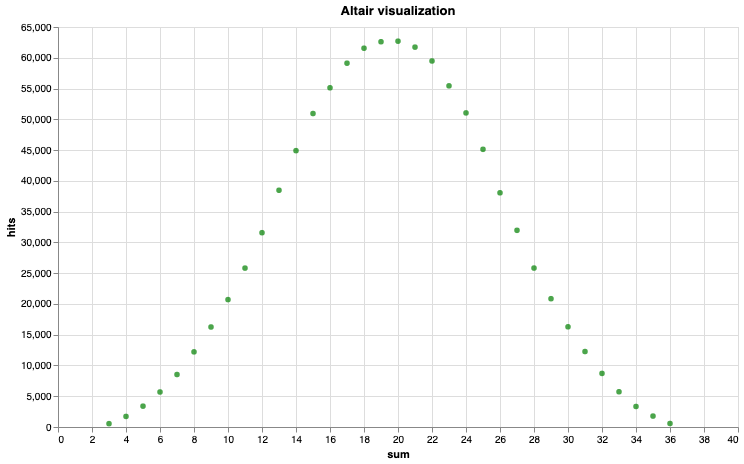

In [5]:
import altair as alt

alt.Chart(df).mark_circle(color='green').encode(
    x='sum',
    y='hits',
    tooltip=['sum', 'hits']
).interactive().properties(title='Altair visualization',width=680,height=400)

Ian also mentioned the [`yellowbrick` visual diagnostic toolset](https://github.com/DistrictDataLabs/yellowbrick) for machine learning that build on `scikit-learn` and `matplotlib`.  It looks promising but I couldn't work out how it might be used to analyse this data.

Instead I tried seeing if I could find a polynomial fit using `numpy polyfit` and `poly1d`.  I found a polynomial of degree 8 provided a good continuous function fit through these discrete values:

polynomial of best fit of degree 8 =

           8            7           6         5         4         3
8.333e-06 x - 0.001305 x + 0.08082 x - 2.494 x + 40.03 x - 336.4 x
         2
 + 1710 x - 3528 x + 2070


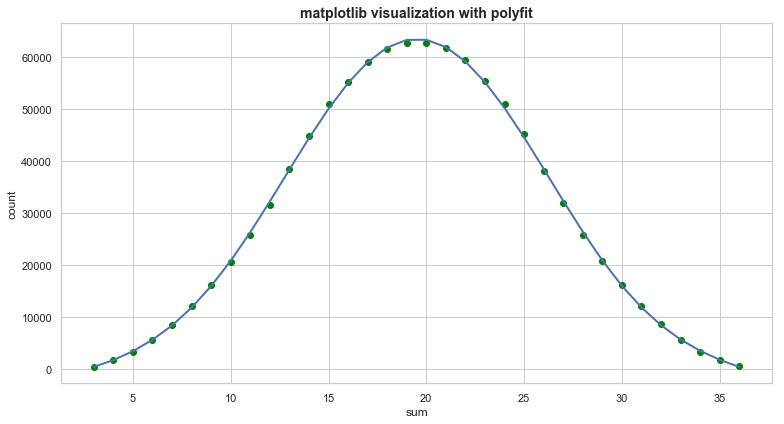

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(11,6))
X = df['sum'].values
y = df['hits'].values

ax = plt.subplot(111)
plt.scatter(X, y,  color='green')

degree = 8
z = np.polyfit(X, y, degree)
p = np.poly1d(z)
print(f'polynomial of best fit of degree {degree} =\n\n{p}')
plt.plot(X, p(X), linewidth=2)
ax.set_title('matplotlib visualization with polyfit',fontsize=14,fontweight='bold')
ax.set_xlabel('sum')
ax.set_ylabel('count')

plt.tight_layout()
plt.show()

<a id='section4'></a>
## 4. Cold starts

[<a href="#contents">back to contents</a>](#contents)

Denys Makogon of Oracle [did a talk](https://pylondinium.org/talks/talk-12.html) on ways to address the cold start problem in Python.  Three key tips were provided:
* Avoiding code in `__init.py__`
* Using `importlib` for custom module import
* Using `lru_cache` for memoization

I recently had to memoize some code in a project so was curious about this last approach.  I tried out `lru_cache` to see what impact it would have on a naive fibonacci implementation and found it very easy to enable yielding suitably impressive results:

Normal fibonacci timing is as follows:

In [7]:
%%time

def fibonacci(n):
    if n < 2:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(35))

9227465
CPU times: user 3.66 s, sys: 9.81 ms, total: 3.67 s
Wall time: 3.69 s


And here's how fast it is with `lru_cache` support enabled via `functools`:

In [8]:
%%time

from functools import lru_cache

@lru_cache(maxsize=None)  # Boundless cache
def fibonacci(n):
    if n < 2:
        return n
    return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(35))

9227465
CPU times: user 294 µs, sys: 78 µs, total: 372 µs
Wall time: 322 µs


<a id='section5'></a>
## 5. Asyncing feeling


[<a href="#contents">back to contents</a>](#contents)

Asynch support in Python was something of a theme.  There was an interesting talk by [PG Jones](https://pgjones.dev) on the Asynchronous Service Gateway interface (or ASGI).  This feels like it will be the successor to the 16-year old WSGI protocol which is now starting to show it's age in three distinct ways:
* Support for Websockets
* Support for HTTP/2 and concurrency
* Support for Async/Await

Essentially in ASGI, the `def application(environ,start_response)` gateway method is replaced by an `async`-`await` equivalent that can stream data back to the client over a websocket which is one of the key reasons backend developers opt for Golang or Javascript for implementing.  ASGI may help tilt that balance but the current position with both ASGI frameworks (eg. starlette, quart) and ASGI-compliant servers (eg. uvicorn, hypercorn) seems a little unclear from a technology selection perspective and we may have to wait for winners to emerge.

One of the lightning talks was on a new Python library for handling GraphQL called [strawberry](https://github.com/strawberry-graphql/strawberry).  The demo looked impressive and involved working with GraphQL queries to a remote website that may have been Pret a Manager.  I had a look at the module but documentation on how to use it seemed thin on the ground.  The main example provided involves using a local starlette-uvicorn combination for the client part to interact with.

<a id='section6'></a>
## 6. Micropython

[<a href="#contents">back to contents</a>](#contents)

Carlos Pereira did an excellent talk introducing Python support for hardware peripheral hacking with Micropython.  He started by introducing the basics of hardware abstraction covering peripheral memory maps, data sheets and the key protocols for accessing hardware, namely UART (Serial), I2C and SPI.  Examples of how to work with each using corresponding Python libraries were worked through.  Carlos also explained how to approach debugging of issues with hardware in a systematic way and using hardware debuggers like the SEGGER or even logic analysers to figure out why your peripheral isn't working.  Micropython looks like a great option for getting started with hardware hacking.  A good device to try it out on that I already have is the BBC Microbit.  Note that UART, I2C and SPI are [all supported](https://makecode.microbit.org/device/pins) on the Microbit.  Later on I found and ordered [this kit](https://www.amazon.co.uk/gp/product/B01LTAB2PG/) to try out.